<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Arquitecturas_famosas_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como hemos visto a lo largo del modulo la preparación de una red convolucional que resuelva una tarea incluye la necesidad de diseñar una arquitectura y tunear sus hiperparámetros.

La comunidad investigadora ha trabajado sobre diversas arquitecturas para obtener redes de neuronas complejas y muy eficientes en sus tareas. 

Entre las arquitecturas famosas que representan el estado del arte actual podemos destacar:

- ResNet
- Inception
- Yolo
- MobileNet

Muchas de estas arquitecturas contienen mecanismos complejos sobre su arquitecctura (Inception o Mobilenet) o en su función de pérdida (YoLo).
El potencial de estas arquitecturas puede verse reflejado en alguna demostración como la que puede en el siguiente enlace:

https://pjreddie.com/darknet/yolo/

Aunque no ha sido nombrado antes, cabe destacar la importancia de una arquitectura que aunque queda lejos del estado del arte actual fue rompedora hace algunos años, esta es la arquitectura VGG.

La complejidad de construcción de estos modelos los deja fuera del alcance de esta clase debido a requisitos de hardware y la dificultad para definir todas las estructuras internas.

Sin embargo, el potencial de ResNet, así como las arquitecturas de VGG pueden definirse de forma sencilla y las trataremos en esta clase.

# VGG

La arquitecctura VGG sigue una estrategia similar a la mostrada en la clase anterior. La idea principal radica en generar una red de neuronas con un conjunto de capas convolucionales y de pooling concatenadas.

El conjunto de capas descritas anteriormente permiten a la red de neuronas extraer información de las imágenes de entrada y obtener características que posteriormente serán utilizadas por una capa densa para predecir el target deseado.

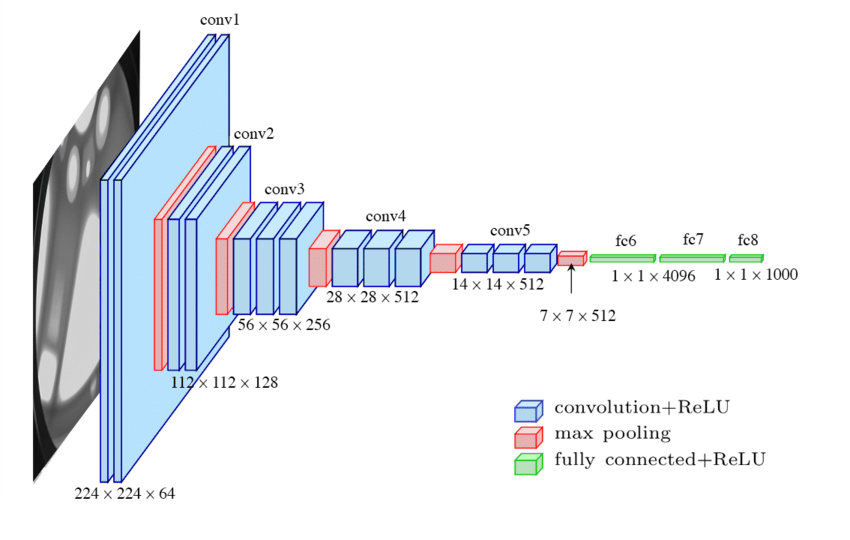

La arquitectura VGG está planteada de la siguiente forma:

- Las imágenes de entrada tienen una resolución de 224x224
- Dos capas convolucionales con tamaño de filtro 3x3 y 64 filtros en cada una. El padding es igual a "same"
- Una capa de maxpooling 2x2 y stride 2x2
- Dos capas convolucionales con 128 filtros cada una y mismos parámetros que la anterior.
- Una capa de maxpooling 2x2 y stride 2x2
- Tres capas convolucionales con 256 filtros y mismos parámetros que la anterior
- Una capa de maxpooling 2x2 y stride 2x2
- Tres capas convolucionales con 512 filtros y mismos parámetros que la anterior
- Una capa de maxpooling 2x2 y stride 2x2
- Tres capas convolucionales con 512 filtros y mismos parámetros que la anterior
- Una última capa de maxpooling 2x2 y stride 2x2
- Tres capas densas con el siguiente número de neuronas: 4096, 4096 y 1000.

Todas las funciones de activaciones utilizadas en las capas son "relu".

# Ejercicio

Construye la arquitectura vgg utilizando la api funcional de keras. Visualizalá utilizando la función plot_model

In [1]:
from tensorflow.keras.utils import plot_model
import tensorflow.keras as keras

In [2]:
# Escribe tu código aquí

# ResNet

Las Residual Networks (ResNet) fueron una arquitectura desarrollada en los laboratorios de Microsoft. La principal novedad de estas arquitecturas radica en la aparición de las conexiones residuales.

Las redes residuales surgen como respuesta al problema del desvanecimiento de gradiente. Para que una red neuronal pueda resolver tareas complejas es necesario dotarlas de profundidad, sin embargo, a mayor profundidad, más se desvanece el gradiente y más complicado es conseguir que las capas superiores se actualicen.

ResNet resuelve este problema mediante las conexiones residuales.


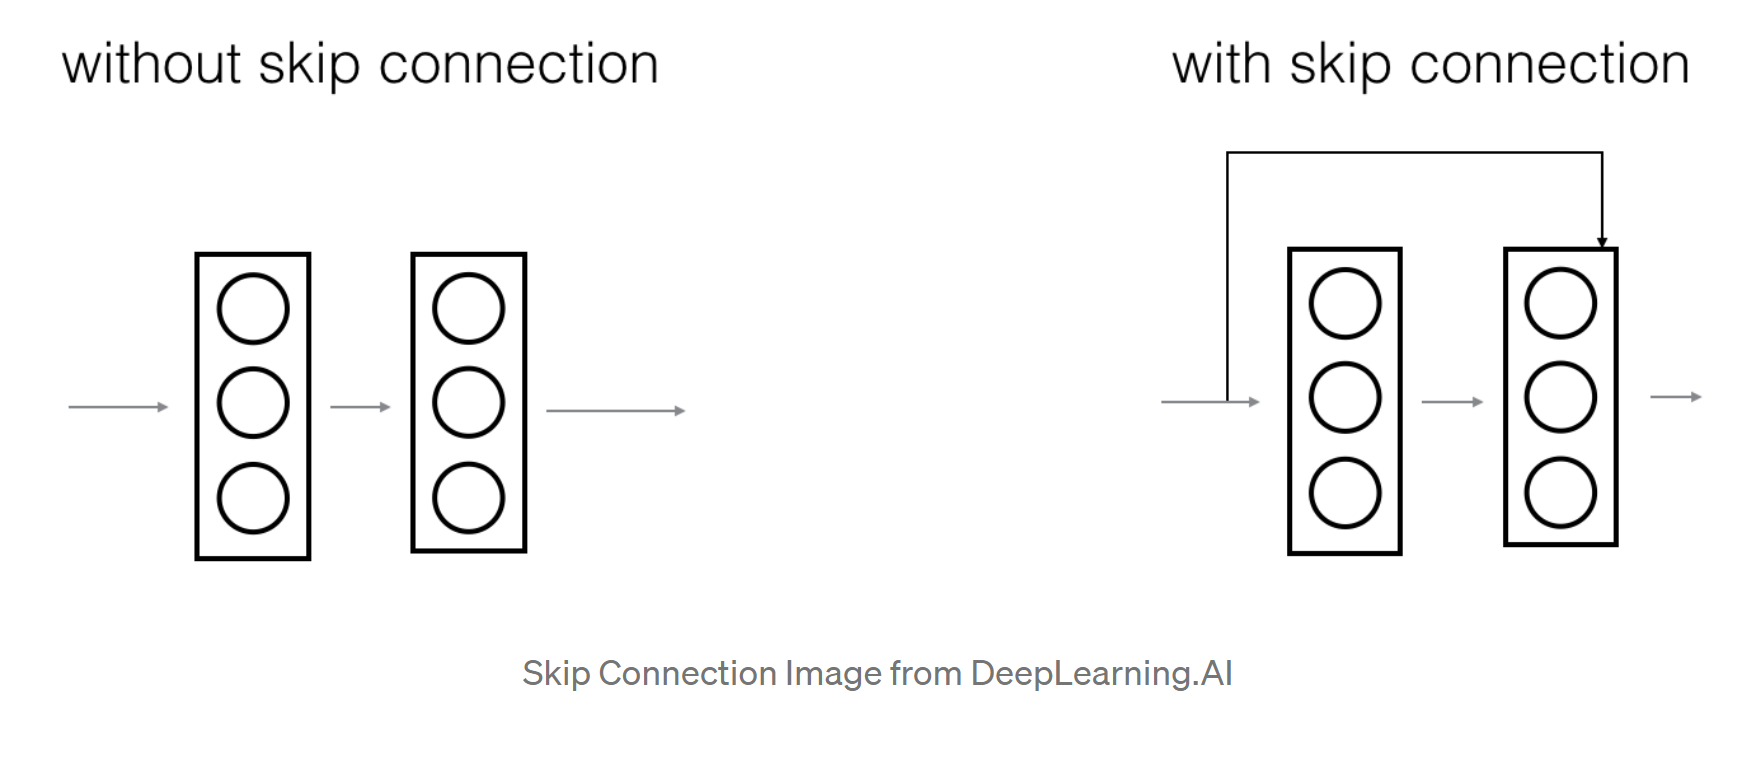

La idea tras las conexiones residuales es simple. Antes de entrar a un bloque de capas convolucionales se crea un canal alternativo. Este canal alternativo extrae la información de la capa anterior y la suma a la salida del bloque siguiente. Tras establecer la conexión se suman ambos filtros y se activan.

Estas conexiones residuales funcionan debido a dos factores principales:

- Construyen canales alternativos para que se desplace el gradiente.
- Permiten a la red de neuronas aprender una función identidad en las capas, de forma que, si el bloque es poco eficiente, se garantice que al menos las capas superiores rendirán "tan bien" como las inferiores.

In [3]:
# Ejemplo resnet
input_layer = keras.layers.Input(shape=(64,64,3))
conv_layer = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same", input_shape=(64,64,3))(input_layer)
conv_layer2 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(conv_layer)
conv_layer3 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(conv_layer2)
add_layer = keras.layers.Add()([conv_layer, conv_layer3])
relu = keras.layers.ReLU()(add_layer)
pooling = keras.layers.MaxPool2D(pool_size=(2,2))(relu)
flatten = keras.layers.Flatten(data_format="channels_last")(pooling)
dense = keras.layers.Dense(512, activation="tanh")(flatten)
classifier = keras.layers.Dense(2, activation="softmax")(dense)
model = keras.Model(inputs=input_layer, outputs=classifier)
model.compile(optimizer="adam", loss="categorical_crossentropy")

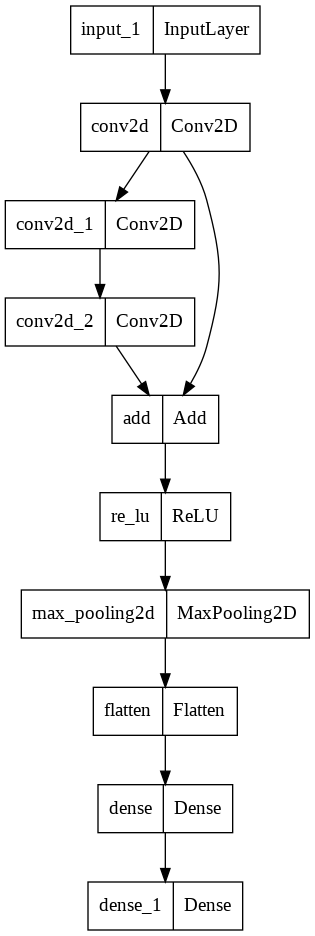

In [4]:
plot_model(model)

# Ejercicio 

Construid un modelo convolucional con 3 bloques de convoluciones con 3 capas convolucionales cada uno (en total 9 capas). Añadid conexiones residuales entre las capas.


In [11]:
# Ejemplo resnet
input_layer = keras.layers.Input(shape=(64,64,3))
conv_layer = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same", input_shape=(64,64,3))(input_layer)
conv_layer2 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(conv_layer)
conv_layer3 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(conv_layer2)
conv_layer4 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(conv_layer3)
conv_layer5 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(conv_layer4)
conv_layer6 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(conv_layer5)
add_layer = keras.layers.Add()([conv_layer3, conv_layer6])
relu = keras.layers.ReLU()(add_layer)
conv_layer7 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(relu)
conv_layer8 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(conv_layer7)
conv_layer9 = keras.layers.Conv2D(10, (3,3), activation="relu", padding="same")(conv_layer8)
add_layer2 = keras.layers.Add()([relu, conv_layer9])
relu2 = keras.layers.ReLU()(add_layer2)
pooling = keras.layers.MaxPool2D(pool_size=(2,2))(relu2)
flatten = keras.layers.Flatten(data_format="channels_last")(pooling)
dense = keras.layers.Dense(512, activation="tanh")(flatten)
classifier = keras.layers.Dense(2, activation="softmax")(dense)
model = keras.Model(inputs=input_layer, outputs=classifier)
model.compile(optimizer="adam", loss="categorical_crossentropy")

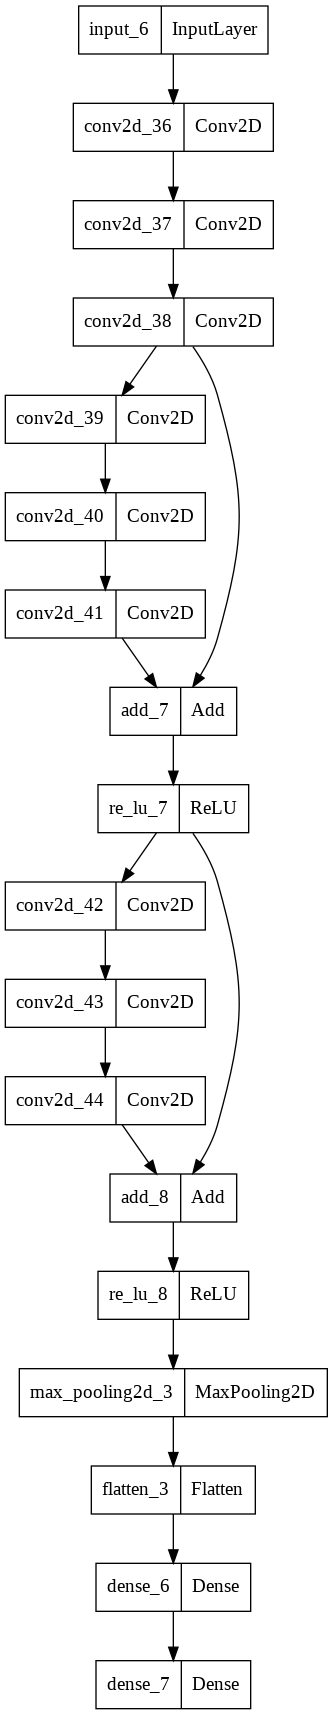

In [12]:
plot_model(model)